In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve,mean_squared_error,r2_score,precision_score,recall_score,f1_score

In [2]:
df=pd.read_csv("cleaned_data.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pickle

X = df.drop(columns=["hg/ha_yield","Area","Item"])
y = df["hg/ha_yield"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)

with open("trained_model.sav", "wb") as f:
    pickle.dump((rf_model, scaler), f)


c:\Users\malar\anaconda5\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [4]:
X = df.drop(columns=["hg/ha_yield","Area","Item"])
y = df["hg/ha_yield"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


gb_model = GradientBoostingRegressor(
    n_estimators=200,   
    learning_rate=0.1,  
    max_depth=3,         
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Performance:")
print("RMSE:", rmse)
print("R²:", r2)

Gradient Boosting Performance:
RMSE: 31766.96027136278
R²: 0.8659570198803832


Decision Tree - Mean Squared Error: 2224313877.3998785
Decision Tree - R² Score: 0.7045467127312516


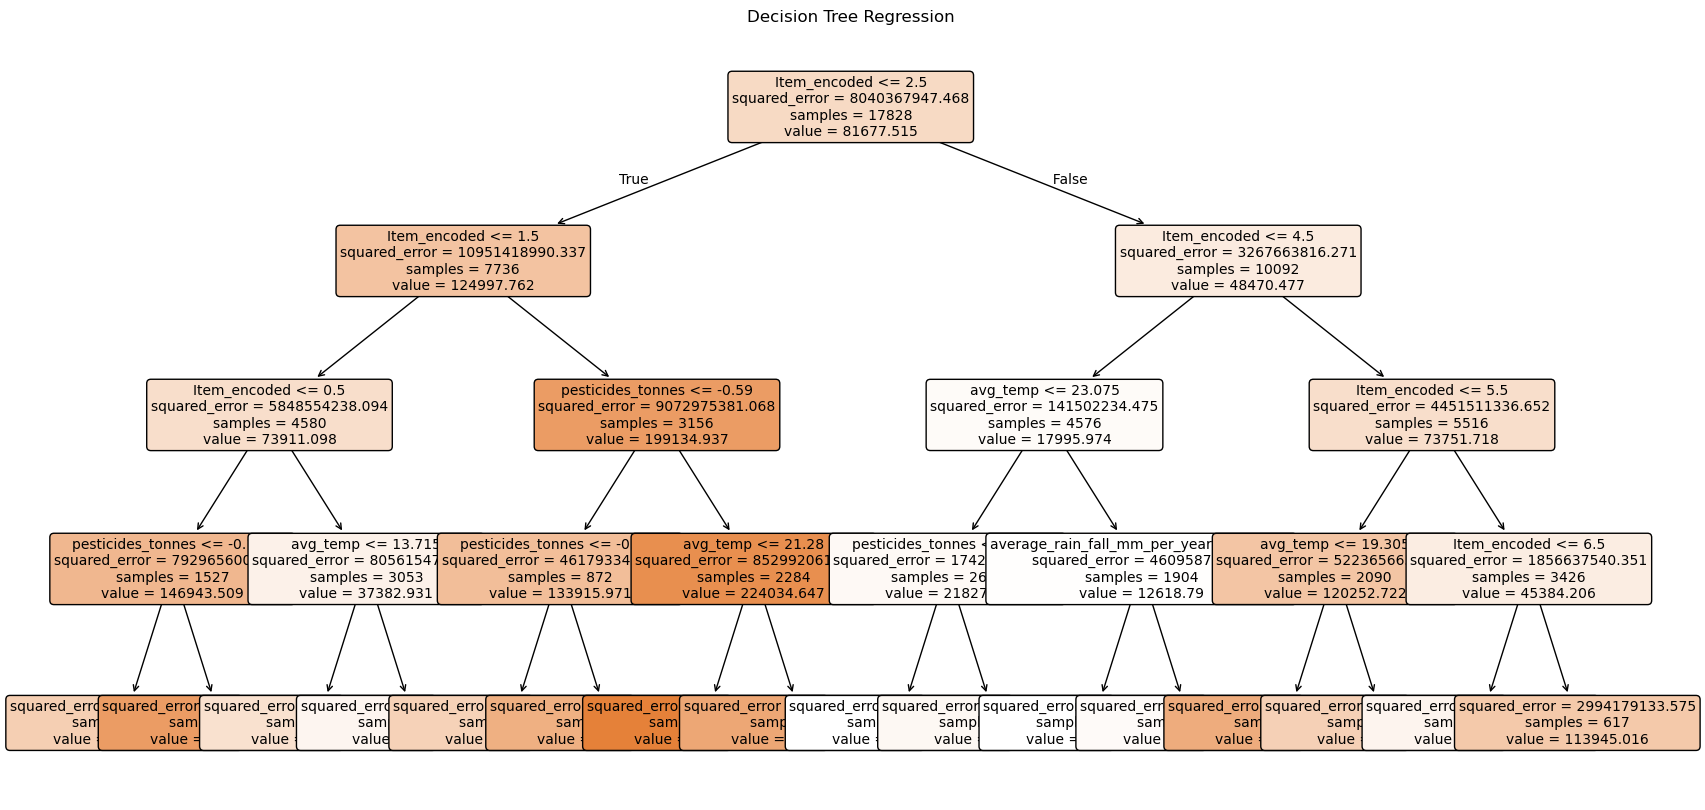

In [5]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

dt_model = DecisionTreeRegressor(max_depth=4, random_state=42) 
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree - Mean Squared Error:", mse_dt)
print("Decision Tree - R² Score:", r2_dt)

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Regression")
plt.show()